In [114]:
import pandas as pd
import seaborn as sns
from pandas_visual_analysis import VisualAnalysis

In [115]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False




In [116]:
# 전체 코드 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [117]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### 1.서울시 5대범죄율 데이터 전처리

In [118]:
# 데이터 불러오기 
crime_seoul=pd.read_csv('../[0]data/서울시_5대범죄율_발생건수(결과).csv',index_col=0)
crime_seoul

,지역구,살인,강도,강간강제추행,절도,폭력,5대범죄
기간,,,,,,,
2017,종로구,7,10,253,1644,2143,4057.0
2017,중구,1,9,267,1846,2061,4184.0
2017,용산구,1,5,327,1346,2381,4060.0
2017,성동구,1,3,132,1072,1559,2767.0
2017,광진구,6,13,261,2220,2146,4646.0
...,...,...,...,...,...,...,...
2019,관악구,13,10,408,2223,2674,5328.0
2019,서초구,5,7,616,2270,2644,5542.0
2019,강남구,5,5,666,2970,3658,7304.0


In [119]:
# 인덱스 초기화 
crime_seoul.reset_index(drop=False,inplace=True)
crime_seoul

,기간,지역구,살인,강도,강간강제추행,절도,폭력,5대범죄
0,2017,종로구,7,10,253,1644,2143,4057.0
1,2017,중구,1,9,267,1846,2061,4184.0
2,2017,용산구,1,5,327,1346,2381,4060.0
3,2017,성동구,1,3,132,1072,1559,2767.0
4,2017,광진구,6,13,261,2220,2146,4646.0
...,...,...,...,...,...,...,...,...
70,2019,관악구,13,10,408,2223,2674,5328.0
71,2019,서초구,5,7,616,2270,2644,5542.0
72,2019,강남구,5,5,666,2970,3658,7304.0
73,2019,송파구,7,10,273,2416,2992,5698.0


In [120]:
# 멀티 인덱스 주기
crime_seoul=crime_seoul.set_index(["기간","지역구"])

In [121]:
crime_seoul.head(40)
crime_seoul.tail(26)

살인  강도  강간강제추행    절도    폭력    5대범죄
기간   지역구                                     
2017 종로구    7  10     253  1644  2143  4057.0
     중구     1   9     267  1846  2061  4184.0
     용산구    1   5     327  1346  2381  4060.0
     성동구    1   3     132  1072  1559  2767.0
     광진구    6  13     261  2220  2146  4646.0
     동대문구  11   3     165  1547  2249  3975.0
     중랑구    5   3     172  1533  2858  4571.0
     성북구    7   8     173  1344  1902  3434.0
     강북구    8   7     208  1014  2156  3393.0
     도봉구    1   3     104   633  1258  1999.0
     노원구    4   9     180  1538  2478  4209.0
     은평구    6   4     230  1387  2256  3883.0
     서대문구   4   1     202  1230  1676  3113.0
     마포구    3   8     500  2094  2673  5278.0
     양천구    3   3     138  1590  2148  3882.0
     강서구   11   4     316  1888  2916  5135.0
     구로구    7   8     328  1725  2827  4895.0
     금천구    5   5     240  1141  1874  3265.0
     영등포구  15   5     455  2304  3190  5969.0
     동작구    1   7     396  1226  1700  3330.0
     관악구    8   7     379  1979  3152  5525.0
     서초구    9  13     470  1812  2404  4708.0
     강남구    7  20     607  3130  3956  7720.0
     송파구    6   1     288  2274  3007  5576.0
     강동구    5  10     172  1645  2429  4261.0
2018 종로구    6   3     236  1483  1962  3690.0
     중구     2  11     207  1855  1955  4030.0
     용산구    1   3     331  1096  1980  3411.0
     성동구    2   5     126   999  1325  2457.0
     광진구    7   2     229  1769  1908  3915.0
     동대문구   2   5     145  1447  2081  3680.0
     중랑구    4   3     174  1526  2581  4288.0
     성북구    7   1     183  1164  1687  3042.0
     강북구    8   7     188  1112  2122  3437.0
     도봉구    1   5     113   781  1349  2249.0
     노원구    5   5     194  1422  2381  4007.0
     은평구    8   1     188  1278  2115  3590.0
     서대문구   5   3     206  1062  1526  2802.0
     마포구    6   6     473  2011  2676  5172.0
     양천구    2   4     120  1384  2005  3515.0

살인  강도  강간강제추행    절도    폭력    5대범죄
기간   지역구                                     
2018 강동구    3   7     170  1515  2224  3919.0
2019 종로구    4   7     238  1515  2082  3846.0
     중구     2   6     195  2202  1922  4327.0
     용산구    3   3     272   999  2036  3313.0
     성동구    6   9     133   970  1394  2512.0
     광진구    4   6     273  1875  1853  4011.0
     동대문구   6  10     168  1531  1977  3692.0
     중랑구   10   4     138  1666  2450  4268.0
     성북구    3   3     176  1082  1613  2877.0
     강북구    6   3     176  1229  2424  3838.0
     도봉구    1   5      90   790  1224  2110.0
     노원구    4   3     184  1498  2464  4153.0
     은평구    3   1     194  1565  2117  3880.0
     서대문구   2   5     175  1226  1535  2943.0
     마포구    2   2     495  2190  2153  4842.0
     양천구    6   2     127  1477  1602  3214.0
     강서구    8   3     306  2050  2557  4924.0
     구로구   10   3     226  1916  2552  4707.0
     금천구    6  10     153  1157  1779  3105.0
     영등포구  10   3     356  2409  3042  5820.0
     동작구    4   1     251  1328  1816  3400.0
     관악구   13  10     408  2223  2674  5328.0
     서초구    5   7     616  2270  2644  5542.0
     강남구    5   5     666  2970  3658  7304.0
     송파구    7  10     273  2416  2992  5698.0
     강동구    6  15     180  1650  2163  4014.0

### 2. 서울시 여자 1인가구 데이터 전처리

In [122]:
# 데이터 불러오기 
female_single=pd.read_csv('../[0]data/서울시_1인가구_여자_연령별(결과).csv',index_col=0)
female_single 

,지역구,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
기간,,,,,,,,,,,,,,,,,
2017,종로구,12044,316,1854,1545,1178,829,694,741,609,713,715,649,693,711,462,335
2017,중구,10338,350,1302,1250,934,770,615,641,536,669,659,632,603,694,405,278
2017,용산구,17900,196,2116,2485,1989,1620,1198,1195,855,1012,985,928,985,1024,785,527
2017,성동구,19103,387,2415,2733,1924,1469,1211,1134,910,1157,1216,1125,1128,1159,717,418
2017,광진구,28236,453,3885,5203,3667,2491,1659,1537,1307,1619,1651,1286,1174,1145,707,452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,관악구,57263,557,9296,15689,7730,4151,2363,2087,1778,2131,2638,2273,2319,2118,1353,780
2019,서초구,23875,294,1699,3608,3401,2663,1812,1702,1244,1226,1556,1282,1191,979,662,556
2019,강남구,37886,331,2306,6161,6162,4935,3098,2363,1685,1650,2188,1926,1762,1408,1016,895


In [123]:
# 인덱스 초기화
female_single.reset_index(drop=False,inplace=True)
female_single

,기간,지역구,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,2017,종로구,12044,316,1854,1545,1178,829,694,741,609,713,715,649,693,711,462,335
1,2017,중구,10338,350,1302,1250,934,770,615,641,536,669,659,632,603,694,405,278
2,2017,용산구,17900,196,2116,2485,1989,1620,1198,1195,855,1012,985,928,985,1024,785,527
3,2017,성동구,19103,387,2415,2733,1924,1469,1211,1134,910,1157,1216,1125,1128,1159,717,418
4,2017,광진구,28236,453,3885,5203,3667,2491,1659,1537,1307,1619,1651,1286,1174,1145,707,452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2019,관악구,57263,557,9296,15689,7730,4151,2363,2087,1778,2131,2638,2273,2319,2118,1353,780
71,2019,서초구,23875,294,1699,3608,3401,2663,1812,1702,1244,1226,1556,1282,1191,979,662,556
72,2019,강남구,37886,331,2306,6161,6162,4935,3098,2363,1685,1650,2188,1926,1762,1408,1016,895
73,2019,송파구,37825,146,1928,6131,5328,4244,2719,2348,1843,2265,2829,2272,2090,1628,1138,916


In [124]:
# 멀티 인덱스 설정
female_single=female_single.set_index(["기간","지역구"])
female_single

합계  20세미만  20~24세  25~29세  30~34세  35~39세  40~44세  45~49세  \
기간   지역구                                                                 
2017 종로구  12044    316    1854    1545    1178     829     694     741   
     중구   10338    350    1302    1250     934     770     615     641   
     용산구  17900    196    2116    2485    1989    1620    1198    1195   
     성동구  19103    387    2415    2733    1924    1469    1211    1134   
     광진구  28236    453    3885    5203    3667    2491    1659    1537   
...         ...    ...     ...     ...     ...     ...     ...     ...   
2019 관악구  57263    557    9296   15689    7730    4151    2363    2087   
     서초구  23875    294    1699    3608    3401    2663    1812    1702   
     강남구  37886    331    2306    6161    6162    4935    3098    2363   
     송파구  37825    146    1928    6131    5328    4244    2719    2348   
     강동구  23514     89    1261    3105    2330    1911    1429    1439   

          50~54세  55~59세  60~64세  65~69세  70~74세  75~79세  80~84세  85세이상  
기간   지역구                                                                 
2017 종로구     609     713     715     649     693     711     462    335  
     중구      536     669     659     632     603     694     405    278  
     용산구     855    1012     985     928     985    1024     785    527  
     성동구     910    1157    1216    1125    1128    1159     717    418  
     광진구    1307    1619    1651    1286    1174    1145     707    452  
...          ...     ...     ...     ...     ...     ...     ...    ...  
2019 관악구    1778    2131    2638    2273    2319    2118    1353    780  
     서초구    1244    1226    1556    1282    1191     979     662    556  
     강남구    1685    1650    2188    1926    1762    1408    1016    895  
     송파구    1843    2265    2829    2272    2090    1628    1138    916  
     강동구    1307    1756    2311    1868    1667    1368     997    676  

[75 rows x 16 columns]

### 3. 정규화


In [125]:
# Min-Max Normalization

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [126]:
# cols = ["살인","강도","강간강제추행","절도","폭력"]
# x = crime_seoul[cols].values
# x

# x_scaled = min_max_scaler.fit_transform(x.astype(float))
# x_scaled

# crime_seoul_norm = pd.DataFrame(x_scaled, columns=cols, index=crime_seoul.index)
# crime_seoul_norm.head(30)
# crime_seoul_norm.tail(20)

# # cols2 = ["강도검거율", "강간검거율", "살인검거율", "절도검거율", "폭력검거율"]
# # crime_seoul_norm[cols2] = crime_seoul[cols2]
# # crime_seoul_norm.head()

In [127]:
# 연도별로 쪼개서 연도별 범죄율을 알아보기
crime_seoul_2017 = crime_seoul.loc[2017]
crime_seoul_2018 = crime_seoul.loc[2018]
crime_seoul_2019 = crime_seoul.loc[2019]

In [128]:
crime_seoul_2017.head(10) 
crime_seoul_2018.head(10)
crime_seoul_2019.head(10) 

,살인,강도,강간강제추행,절도,폭력,5대범죄
지역구,,,,,,
종로구,7,10,253,1644,2143,4057.0
중구,1,9,267,1846,2061,4184.0
용산구,1,5,327,1346,2381,4060.0
성동구,1,3,132,1072,1559,2767.0
광진구,6,13,261,2220,2146,4646.0
동대문구,11,3,165,1547,2249,3975.0
중랑구,5,3,172,1533,2858,4571.0
성북구,7,8,173,1344,1902,3434.0
강북구,8,7,208,1014,2156,3393.0


,살인,강도,강간강제추행,절도,폭력,5대범죄
지역구,,,,,,
종로구,6,3,236,1483,1962,3690.0
중구,2,11,207,1855,1955,4030.0
용산구,1,3,331,1096,1980,3411.0
성동구,2,5,126,999,1325,2457.0
광진구,7,2,229,1769,1908,3915.0
동대문구,2,5,145,1447,2081,3680.0
중랑구,4,3,174,1526,2581,4288.0
성북구,7,1,183,1164,1687,3042.0
강북구,8,7,188,1112,2122,3437.0


,살인,강도,강간강제추행,절도,폭력,5대범죄
지역구,,,,,,
종로구,4,7,238,1515,2082,3846.0
중구,2,6,195,2202,1922,4327.0
용산구,3,3,272,999,2036,3313.0
성동구,6,9,133,970,1394,2512.0
광진구,4,6,273,1875,1853,4011.0
동대문구,6,10,168,1531,1977,3692.0
중랑구,10,4,138,1666,2450,4268.0
성북구,3,3,176,1082,1613,2877.0
강북구,6,3,176,1229,2424,3838.0


In [129]:
cols = ["살인","강도","강간강제추행","절도","폭력"]
x = crime_seoul_2017[cols].values
x

x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

crime_seoul_norm = pd.DataFrame(x_scaled, columns=cols, index=crime_seoul_2017.index)
crime_seoul_norm.head(30)
crime_seoul_norm.tail()

array([[   7,   10,  253, 1644, 2143],
       [   1,    9,  267, 1846, 2061],
       [   1,    5,  327, 1346, 2381],
       [   1,    3,  132, 1072, 1559],
       [   6,   13,  261, 2220, 2146],
       [  11,    3,  165, 1547, 2249],
       [   5,    3,  172, 1533, 2858],
       [   7,    8,  173, 1344, 1902],
       [   8,    7,  208, 1014, 2156],
       [   1,    3,  104,  633, 1258],
       [   4,    9,  180, 1538, 2478],
       [   6,    4,  230, 1387, 2256],
       [   4,    1,  202, 1230, 1676],
       [   3,    8,  500, 2094, 2673],
       [   3,    3,  138, 1590, 2148],
       [  11,    4,  316, 1888, 2916],
       [   7,    8,  328, 1725, 2827],
       [   5,    5,  240, 1141, 1874],
       [  15,    5,  455, 2304, 3190],
       [   1,    7,  396, 1226, 1700],
       [   8,    7,  379, 1979, 3152],
       [   9,   13,  470, 1812, 2404],
       [   7,   20,  607, 3130, 3956],
       [   6,    1,  288, 2274, 3007],
       [   5,   10,  172, 1645, 2429]], dtype=int64)

array([[0.42857143, 0.47368421, 0.29622266, 0.40488586, 0.32802076],
       [0.        , 0.42105263, 0.32405567, 0.48578294, 0.29762787],
       [0.        , 0.21052632, 0.44333996, 0.28554265, 0.41623425],
       [0.        , 0.10526316, 0.055666  , 0.17581097, 0.11156412],
       [0.35714286, 0.63157895, 0.31212724, 0.63556268, 0.32913269],
       [0.71428571, 0.10526316, 0.12127237, 0.36603925, 0.36730912],
       [0.28571429, 0.10526316, 0.13518887, 0.36043252, 0.59303188],
       [0.42857143, 0.36842105, 0.13717694, 0.28474169, 0.23869533],
       [0.5       , 0.31578947, 0.20675944, 0.1525831 , 0.33283914],
       [0.        , 0.10526316, 0.        , 0.        , 0.        ],
       [0.21428571, 0.42105263, 0.15109344, 0.36243492, 0.45218681],
       [0.35714286, 0.15789474, 0.25049702, 0.30196235, 0.36990363],
       [0.21428571, 0.        , 0.19483101, 0.2390869 , 0.15492958],
       [0.14285714, 0.36842105, 0.78727634, 0.58510212, 0.52446256],
       [0.14285714, 0.10526316, 0.

,살인,강도,강간강제추행,절도,폭력
지역구,,,,,
종로구,0.428571,0.473684,0.296223,0.404886,0.328021
중구,0.000000,0.421053,0.324056,0.485783,0.297628
용산구,0.000000,0.210526,0.443340,0.285543,0.416234
성동구,0.000000,0.105263,0.055666,0.175811,0.111564
광진구,0.357143,0.631579,0.312127,0.635563,0.329133
동대문구,0.714286,0.105263,0.121272,0.366039,0.367309
중랑구,0.285714,0.105263,0.135189,0.360433,0.593032
성북구,0.428571,0.368421,0.137177,0.284742,0.238695
강북구,0.500000,0.315789,0.206759,0.152583,0.332839


,살인,강도,강간강제추행,절도,폭력
지역구,,,,,
관악구,0.500000,0.315789,0.546720,0.539047,0.702001
서초구,0.571429,0.631579,0.727634,0.472167,0.424759
강남구,0.428571,1.000000,1.000000,1.000000,1.000000
송파구,0.357143,0.000000,0.365805,0.657189,0.648258
강동구,0.285714,0.473684,0.135189,0.405286,0.434025


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


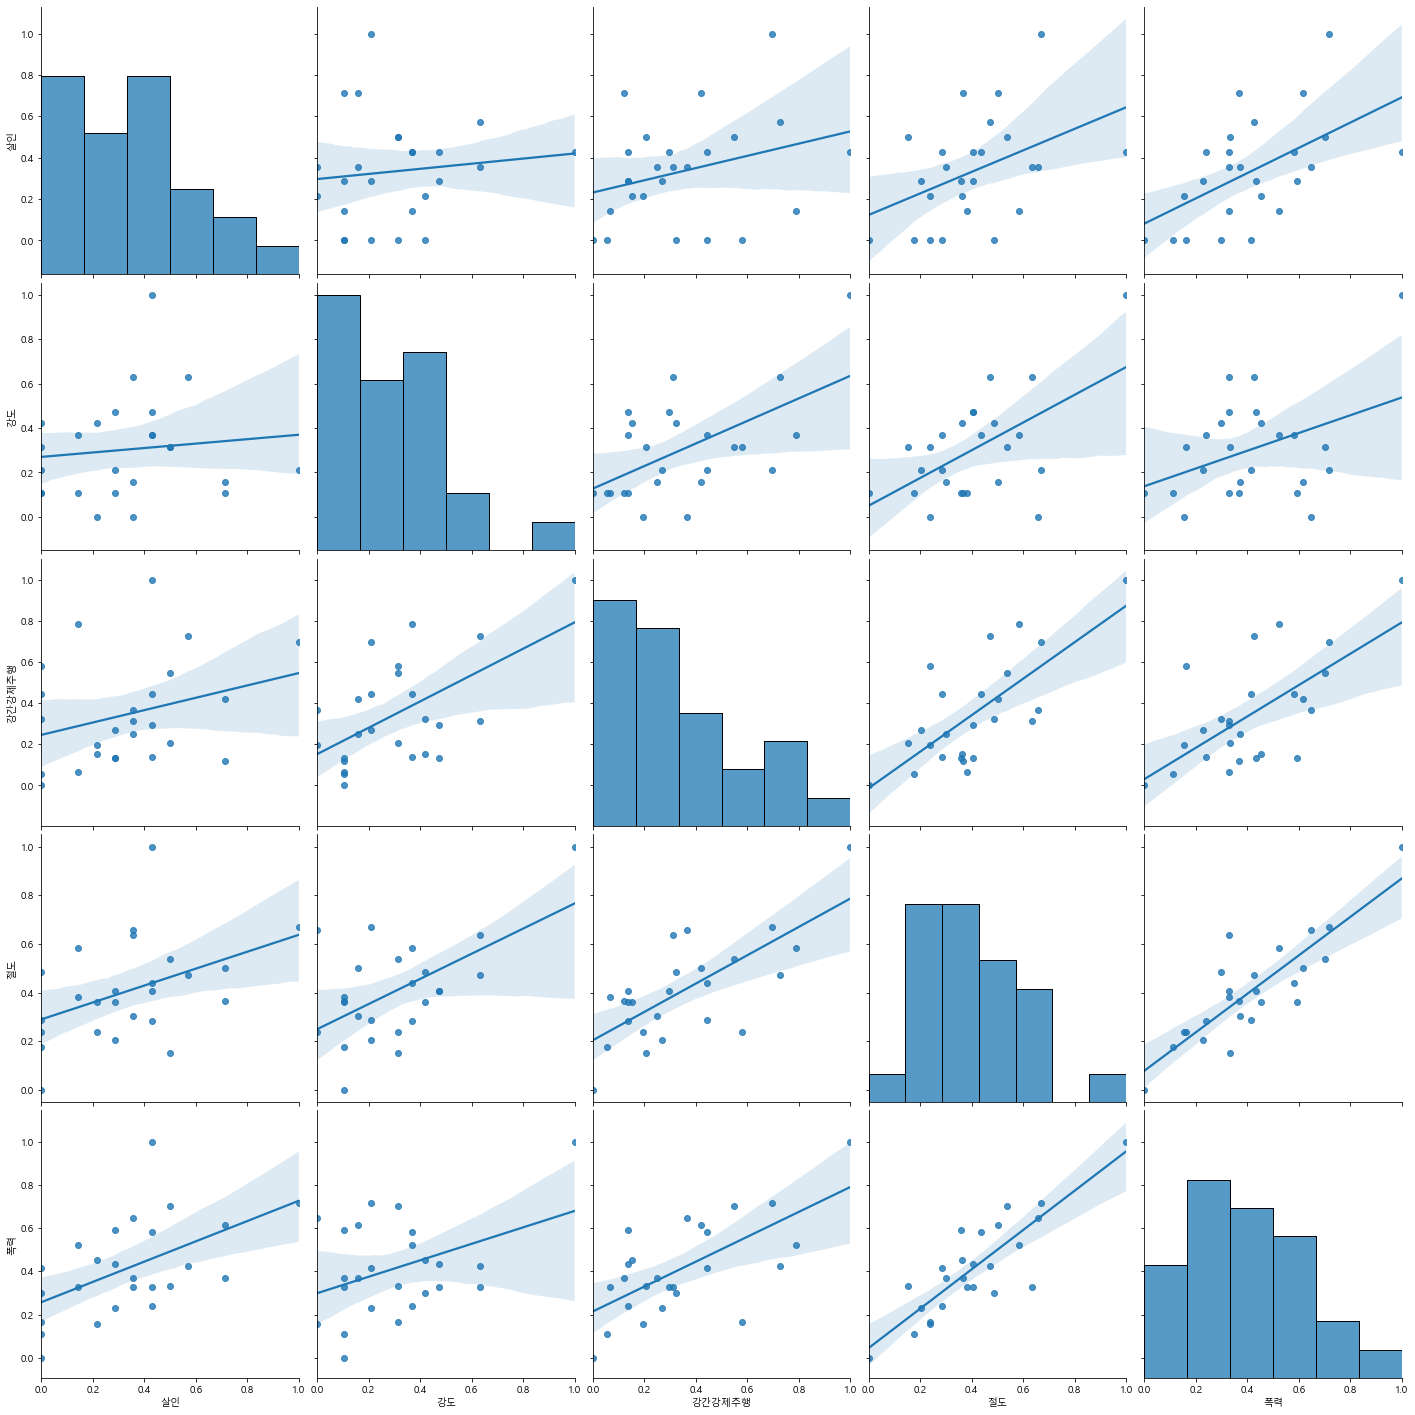

In [130]:
# 5대범죄간의 상관 관계 (2017년)
# pairplot : 데이터에 들어 있는 각 컬럼(열)들의 모든 상관 관계를 출력

sns.pairplot(crime_seoul_norm, vars=["살인","강도","강간강제추행","절도","폭력"], size=4, kind="reg")

In [131]:
# 연도별로 쪼개서 연도별 범죄율을 알아보기
female_single_2017 = female_single.loc[2017]
female_single_2018 = female_single.loc[2018]
female_single_2019 = female_single.loc[2019]

In [132]:
female_single_2017.head(10) 
female_single_2018.head(10)
female_single_2019.head(10)

,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
지역구,,,,,,,,,,,,,,,,
종로구,12044,316,1854,1545,1178,829,694,741,609,713,715,649,693,711,462,335
중구,10338,350,1302,1250,934,770,615,641,536,669,659,632,603,694,405,278
용산구,17900,196,2116,2485,1989,1620,1198,1195,855,1012,985,928,985,1024,785,527
성동구,19103,387,2415,2733,1924,1469,1211,1134,910,1157,1216,1125,1128,1159,717,418
광진구,28236,453,3885,5203,3667,2491,1659,1537,1307,1619,1651,1286,1174,1145,707,452
동대문구,26392,976,5103,3486,2077,1547,1181,1177,1075,1515,1668,1654,1696,1658,1002,577
중랑구,23543,115,1209,2217,1954,1649,1454,1596,1674,2253,2213,1975,1866,1727,1004,637
성북구,29683,977,6225,3778,2157,1574,1355,1444,1247,1660,1874,1740,1874,1845,1207,726
강북구,21273,262,1616,1787,1355,1206,1147,1348,1327,1873,1960,1998,1923,1835,1043,593


,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
지역구,,,,,,,,,,,,,,,,
종로구,12691,494,1980,1748,1146,904,676,770,670,711,707,619,702,707,509,348
중구,10751,405,1365,1346,1027,801,607,625,543,659,678,634,603,681,467,310
용산구,18446,247,2137,2668,2096,1724,1195,1204,864,944,1057,891,994,1015,836,574
성동구,20397,444,2666,2969,2027,1587,1183,1216,987,1204,1317,1160,1189,1219,794,435
광진구,29280,428,4087,5700,3708,2570,1579,1547,1281,1646,1724,1351,1233,1169,780,477
동대문구,27495,1151,5378,3657,2083,1579,1195,1237,1129,1479,1792,1653,1739,1715,1072,636
중랑구,24496,104,1149,2456,2027,1737,1354,1608,1716,2238,2450,2018,1998,1850,1096,695
성북구,30359,1106,6516,3823,2119,1579,1240,1502,1219,1578,1984,1763,1943,1894,1312,781
강북구,22364,265,1957,2004,1348,1228,1070,1361,1376,1839,2140,2036,1999,1961,1137,643


,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
지역구,,,,,,,,,,,,,,,,
종로구,12729,349,2044,1725,1181,913,678,760,641,725,755,639,704,727,534,354
중구,11401,325,1444,1482,1158,874,662,648,578,646,752,634,658,678,494,368
용산구,18944,192,2119,2817,2238,1801,1231,1205,918,917,1083,925,1012,1025,873,588
성동구,20963,347,2693,3182,2132,1623,1186,1268,983,1177,1331,1199,1242,1210,884,506
광진구,30679,364,4281,6075,3974,2669,1637,1548,1352,1612,1822,1401,1300,1221,849,574
동대문구,28976,941,6199,4063,2149,1582,1223,1230,1109,1450,1884,1672,1795,1774,1204,701
중랑구,26208,111,1342,2937,2218,1769,1380,1583,1701,2266,2708,2143,2123,1886,1248,793
성북구,31701,908,6855,4257,2197,1631,1272,1523,1271,1632,2061,1796,2033,1933,1427,905
강북구,23274,224,2120,2207,1400,1201,1065,1349,1431,1788,2275,2067,2155,2039,1261,692


In [133]:
cols = ["합계"]
x = female_single_2017[cols].values
x

x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

female_single_2017_norm = pd.DataFrame(x_scaled, columns=cols, index=female_single_2017.index)
female_single_2017_norm.head()
female_single_2017_norm.tail()

array([[12044],
       [10338],
       [17900],
       [19103],
       [28236],
       [26392],
       [23543],
       [29683],
       [21273],
       [16376],
       [28525],
       [25808],
       [24527],
       [30126],
       [17836],
       [36703],
       [21618],
       [14623],
       [25198],
       [27966],
       [49787],
       [22219],
       [36259],
       [31947],
       [20986]], dtype=int64)

array([[0.04324571],
       [0.        ],
       [0.19169054],
       [0.22218561],
       [0.45369971],
       [0.40695582],
       [0.33473599],
       [0.49037998],
       [0.27719334],
       [0.15305838],
       [0.46102563],
       [0.39215189],
       [0.35967959],
       [0.50160967],
       [0.19006819],
       [0.66833126],
       [0.28593881],
       [0.10862126],
       [0.37668889],
       [0.44685543],
       [1.        ],
       [0.30117367],
       [0.65707622],
       [0.54777054],
       [0.26991812]])

,합계
지역구,
종로구,0.043246
중구,0.000000
용산구,0.191691
성동구,0.222186
광진구,0.453700


,합계
지역구,
관악구,1.000000
서초구,0.301174
강남구,0.657076
송파구,0.547771
강동구,0.269918


In [134]:

# sns.pairplot(female_single_2017_norm, vars=["합계"], size=4, kind="reg")

### 지역별 여성 1인가구 대비 5대범죄발생율 (분모는 여성1인가구)
- 연도별 지자체별 5대범죄발생건수 / 연도별 지자체별 여성1인가구수  

# 여성1인가구 / 강간강제추행 발생율 OR 검거율 

In [135]:
# 연도별로 5대범죄 데이터 분할
crime_seoul_2017=crime_seoul_2017.sort_values('5대범죄',ascending=False)
crime_seoul_2018=crime_seoul_2018.sort_values('5대범죄',ascending=False)
crime_seoul_2019=crime_seoul_2019.sort_values('5대범죄',ascending=False)

In [136]:
crime_seoul_2017.head(10)
crime_seoul_2018.head(10)
crime_seoul_2019.head(10) 

,살인,강도,강간강제추행,절도,폭력,5대범죄
지역구,,,,,,
강남구,7,20,607,3130,3956,7720.0
영등포구,15,5,455,2304,3190,5969.0
송파구,6,1,288,2274,3007,5576.0
관악구,8,7,379,1979,3152,5525.0
마포구,3,8,500,2094,2673,5278.0
강서구,11,4,316,1888,2916,5135.0
구로구,7,8,328,1725,2827,4895.0
서초구,9,13,470,1812,2404,4708.0
광진구,6,13,261,2220,2146,4646.0


,살인,강도,강간강제추행,절도,폭력,5대범죄
지역구,,,,,,
강남구,10,14,600,3004,3885,7513.0
영등포구,17,8,391,2292,3132,5840.0
송파구,5,6,309,2352,3135,5807.0
마포구,6,6,473,2011,2676,5172.0
관악구,9,10,352,2012,2643,5026.0
구로구,8,9,250,1717,2826,4810.0
서초구,5,5,470,1851,2395,4726.0
강서구,11,6,269,1724,2619,4629.0
중랑구,4,3,174,1526,2581,4288.0


,살인,강도,강간강제추행,절도,폭력,5대범죄
지역구,,,,,,
강남구,5,5,666,2970,3658,7304.0
영등포구,10,3,356,2409,3042,5820.0
송파구,7,10,273,2416,2992,5698.0
서초구,5,7,616,2270,2644,5542.0
관악구,13,10,408,2223,2674,5328.0
강서구,8,3,306,2050,2557,4924.0
마포구,2,2,495,2190,2153,4842.0
구로구,10,3,226,1916,2552,4707.0
중구,2,6,195,2202,1922,4327.0


In [137]:
# 연도별로 5대범죄 데이터 분할
female_single_2017=female_single_2017.sort_values('합계',ascending=False)
female_single_2018=female_single_2018.sort_values('합계',ascending=False)
female_single_2019=female_single_2019.sort_values('합계',ascending=False)

In [138]:
# 연도별로 1인 여성가구수 데이터 분할
female_single_2017.head(10) 
female_single_2018.head(10)
female_single_2019.head(10)

,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
지역구,,,,,,,,,,,,,,,,
관악구,49787,556,7359,12378,7023,3921,2354,1981,1728,2269,2410,2158,2052,1917,1050,631
강서구,36703,156,2512,5753,4320,3146,2234,2030,1850,2710,2924,2444,2194,2017,1422,991
강남구,36259,279,2188,5814,6138,4803,3016,2229,1614,1786,2014,1823,1565,1321,920,749
송파구,31947,141,1540,4504,4559,3562,2447,2163,1652,2242,2316,1922,1696,1394,1064,745
마포구,30126,367,3618,5474,4358,2973,2128,1710,1200,1324,1397,1373,1386,1357,938,523
성북구,29683,977,6225,3778,2157,1574,1355,1444,1247,1660,1874,1740,1874,1845,1207,726
노원구,28525,682,3028,1696,1326,1378,1419,1601,1534,2297,2743,2651,2608,2681,1794,1087
광진구,28236,453,3885,5203,3667,2491,1659,1537,1307,1619,1651,1286,1174,1145,707,452
동작구,27966,618,3928,5061,3343,2023,1444,1293,1074,1477,1621,1627,1523,1453,934,547


,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
지역구,,,,,,,,,,,,,,,,
관악구,53288,558,8438,13906,7294,4142,2285,2028,1667,2230,2502,2191,2197,2016,1160,674
강서구,39231,151,2571,6665,4600,3348,2335,2175,1858,2662,3257,2550,2366,2106,1542,1045
강남구,36009,243,2176,5833,5922,4868,2917,2201,1579,1631,2039,1823,1631,1355,978,813
송파구,34711,127,1784,5282,4904,3958,2501,2290,1721,2223,2626,2109,1806,1470,1090,820
마포구,31845,421,3879,6080,4499,3157,2158,1806,1262,1328,1475,1379,1434,1414,984,569
성북구,30359,1106,6516,3823,2119,1579,1240,1502,1219,1578,1984,1763,1943,1894,1312,781
노원구,29606,490,3166,1868,1321,1458,1400,1630,1623,2310,2928,2742,2749,2751,1958,1212
동작구,29420,609,4365,5499,3370,2120,1413,1368,1067,1481,1751,1653,1645,1481,1023,575
광진구,29280,428,4087,5700,3708,2570,1579,1547,1281,1646,1724,1351,1233,1169,780,477


,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
지역구,,,,,,,,,,,,,,,,
관악구,57263,557,9296,15689,7730,4151,2363,2087,1778,2131,2638,2273,2319,2118,1353,780
강서구,43142,192,3037,7963,5221,3472,2423,2249,1989,2590,3479,2803,2582,2236,1701,1205
강남구,37886,331,2306,6161,6162,4935,3098,2363,1685,1650,2188,1926,1762,1408,1016,895
송파구,37825,146,1928,6131,5328,4244,2719,2348,1843,2265,2829,2272,2090,1628,1138,916
마포구,33577,298,4335,6696,4721,3264,2153,1928,1305,1303,1547,1327,1525,1450,1070,655
성북구,31701,908,6855,4257,2197,1631,1272,1523,1271,1632,2061,1796,2033,1933,1427,905
동작구,31342,506,4679,6339,3557,2210,1397,1343,1199,1346,1874,1742,1783,1542,1119,706
노원구,30809,420,3088,2023,1393,1464,1360,1666,1722,2246,3125,2868,2980,2926,2131,1397
광진구,30679,364,4281,6075,3974,2669,1637,1548,1352,1612,1822,1401,1300,1221,849,574


In [139]:
# 5대범죄 데이터에서 총범죄율만 추출 
crime_total_2017 = crime_seoul_2017[['5대범죄']]
crime_total_2018 = crime_seoul_2018[['5대범죄']]
crime_total_2019 = crime_seoul_2019[['5대범죄']]

In [140]:
crime_total_2017 = crime_seoul_2017[['5대범죄']]
crime_total_2018 = crime_seoul_2018[['5대범죄']]
crime_total_2019 = crime_seoul_2019[['5대범죄']]

In [141]:
crime_total_2017.head(10)
crime_total_2018.head(10)
crime_total_2019.head(10)

,5대범죄
지역구,
강남구,7720.0
영등포구,5969.0
송파구,5576.0
관악구,5525.0
마포구,5278.0
강서구,5135.0
구로구,4895.0
서초구,4708.0
광진구,4646.0


,5대범죄
지역구,
강남구,7513.0
영등포구,5840.0
송파구,5807.0
마포구,5172.0
관악구,5026.0
구로구,4810.0
서초구,4726.0
강서구,4629.0
중랑구,4288.0


,5대범죄
지역구,
강남구,7304.0
영등포구,5820.0
송파구,5698.0
서초구,5542.0
관악구,5328.0
강서구,4924.0
마포구,4842.0
구로구,4707.0
중구,4327.0


In [142]:
# 여성 1인가구 데이터에서 지역구별 총인원수만 추출

In [143]:
female_total_2017 = female_single_2017[['합계']]
female_total_2018 = female_single_2018[['합계']]
female_total_2019 = female_single_2019[['합계']]

In [144]:
female_total_2017
# female_total_2018
# female_total_2019

,합계
지역구,
관악구,49787
강서구,36703
강남구,36259
송파구,31947
마포구,30126
성북구,29683
노원구,28525
광진구,28236
동작구,27966


In [145]:
# 두개(여성1인가구합계,범죄발생합계)의 데이터 합치기(지역구를 기준으로)
crime_female_2017=pd.merge(crime_total_2017,female_total_2017,on='지역구')
crime_female_2018=pd.merge(crime_total_2018,female_total_2018,on='지역구')
crime_female_2019=pd.merge(crime_total_2018,female_total_2019,on='지역구')

In [146]:
crime_female_2017
crime_female_2018
crime_female_2019

,5대범죄,합계
지역구,,
강남구,7720.0,36259
영등포구,5969.0,25198
송파구,5576.0,31947
관악구,5525.0,49787
마포구,5278.0,30126
강서구,5135.0,36703
구로구,4895.0,21618
서초구,4708.0,22219
광진구,4646.0,28236


,5대범죄,합계
지역구,,
강남구,7513.0,36009
영등포구,5840.0,26387
송파구,5807.0,34711
마포구,5172.0,31845
관악구,5026.0,53288
구로구,4810.0,22264
서초구,4726.0,23055
강서구,4629.0,39231
중랑구,4288.0,24496


,5대범죄,합계
지역구,,
강남구,7513.0,37886
영등포구,5840.0,28917
송파구,5807.0,37825
마포구,5172.0,33577
관악구,5026.0,57263
구로구,4810.0,24285
서초구,4726.0,23875
강서구,4629.0,43142
중랑구,4288.0,26208


In [147]:
# 컬럼명 재설정 (5대범죄 발생건수 / 1인여성가구 합계)

crime_female_2017.rename(columns = {'5대범죄' : '5대범죄',
                                   '합계':'여성1인가구'},inplace = True)
crime_female_2018.rename(columns = {'5대범죄' : '5대범죄',
                                   '합계':'여성1인가구'},inplace = True)
crime_female_2019.rename(columns = {'5대범죄' : '5대범죄',
                                   '합계':'여성1인가구'},inplace = True)



In [148]:
# 여성 1인가구 대비 5대 범죄 발생율 데이터 구하기 -> 2017

crime_female_2017["5대범죄/여성1인가구"]=(crime_female_2017['5대범죄']/crime_female_2017["여성1인가구"]*100).round(2)
crime_female_2017=crime_female_2017.sort_values('5대범죄/여성1인가구',ascending=False)
crime_female_2017

,5대범죄,여성1인가구,5대범죄/여성1인가구
지역구,,,
중구,4184.0,10338,40.47
종로구,4057.0,12044,33.68
영등포구,5969.0,25198,23.69
용산구,4060.0,17900,22.68
구로구,4895.0,21618,22.64
금천구,3265.0,14623,22.33
양천구,3882.0,17836,21.76
강남구,7720.0,36259,21.29
서초구,4708.0,22219,21.19


In [149]:
# 여성 1인가구 대비 5대 범죄 발생율 데이터 구하기 -> 2018

crime_female_2018["5대범죄/여성1인가구"]=(crime_female_2018['5대범죄']/crime_female_2018["여성1인가구"]*100).round(2)
crime_female_2018=crime_female_2018.sort_values('5대범죄/여성1인가구',ascending=False)
crime_female_2018

,5대범죄,여성1인가구,5대범죄/여성1인가구
지역구,,,
중구,4030.0,10751,37.48
종로구,3690.0,12691,29.08
영등포구,5840.0,26387,22.13
구로구,4810.0,22264,21.60
금천구,3293.0,15485,21.27
강남구,7513.0,36009,20.86
서초구,4726.0,23055,20.50
양천구,3515.0,18477,19.02
용산구,3411.0,18446,18.49


In [150]:
# 여성 1인가구 대비 5대 범죄 발생율 데이터 구하기 -> 2019

crime_female_2019["5대범죄/여성1인가구"]=(crime_female_2019['5대범죄']/crime_female_2019["여성1인가구"]*100).round(2)
crime_female_2019=crime_female_2019.sort_values('5대범죄/여성1인가구',ascending=False)
crime_female_2019

,5대범죄,여성1인가구,5대범죄/여성1인가구
지역구,,,
중구,4030.0,11401,35.35
종로구,3690.0,12729,28.99
영등포구,5840.0,28917,20.20
강남구,7513.0,37886,19.83
구로구,4810.0,24285,19.81
서초구,4726.0,23875,19.79
금천구,3293.0,17079,19.28
용산구,3411.0,18944,18.01
양천구,3515.0,19687,17.85


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


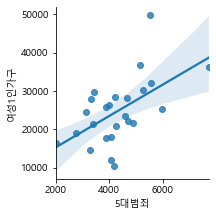

In [151]:
sns.pairplot(crime_female_2017, x_vars=["5대범죄"], 
             y_vars=["여성1인가구"], 
             size=3, kind="reg")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


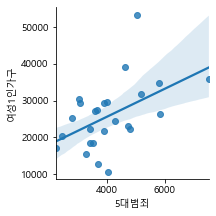

In [152]:
sns.pairplot(crime_female_2018, x_vars=["5대범죄"], 
             y_vars=["여성1인가구"], 
             size=3, kind="reg")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


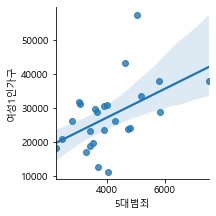

In [153]:
sns.pairplot(crime_female_2019, x_vars=["5대범죄"], 
             y_vars=["여성1인가구"], 
             size=3, kind="reg")

### 여성1인가구대비 5대범죄율 히트맵

In [154]:
htmap2017 = crime_female_2017[['5대범죄/여성1인가구']]
htmap2018 = crime_female_2018[['5대범죄/여성1인가구']]
htmap2019 = crime_female_2019[['5대범죄/여성1인가구']]

In [155]:
htmap1=htmap2017.merge(htmap2018,on='지역구')


In [156]:
htmap_final= htmap1.merge(htmap2019,on='지역구')
htmap_final

,5대범죄/여성1인가구_x,5대범죄/여성1인가구_y,5대범죄/여성1인가구
지역구,,,
중구,40.47,37.48,35.35
종로구,33.68,29.08,28.99
영등포구,23.69,22.13,20.20
용산구,22.68,18.49,18.01
구로구,22.64,21.60,19.81
금천구,22.33,21.27,19.28
양천구,21.76,19.02,17.85
강남구,21.29,20.86,19.83
서초구,21.19,20.50,19.79


In [157]:
# 컬럼명 년도별로 재설정 

htmap_final.rename(columns = {'5대범죄/여성1인가구_x' : '5대범죄/여성1인가구(2017)',
                                   '5대범죄/여성1인가구_y':'5대범죄/여성1인가구(2018)',
                            '5대범죄/여성1인가구':'5대범죄/여성1인가구(2019)' },inplace = True)



In [158]:
htmap_final

,5대범죄/여성1인가구(2017),5대범죄/여성1인가구(2018),5대범죄/여성1인가구(2019)
지역구,,,
중구,40.47,37.48,35.35
종로구,33.68,29.08,28.99
영등포구,23.69,22.13,20.20
용산구,22.68,18.49,18.01
구로구,22.64,21.60,19.81
금천구,22.33,21.27,19.28
양천구,21.76,19.02,17.85
강남구,21.29,20.86,19.83
서초구,21.19,20.50,19.79


In [159]:
htmap_final.to_csv('../[0]data/여자1인가구_5대범죄발생(시각화).csv')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='지역구'>

Text(0.5, 1.0, '<여성1인가구 대비 5대범죄 발생율>')

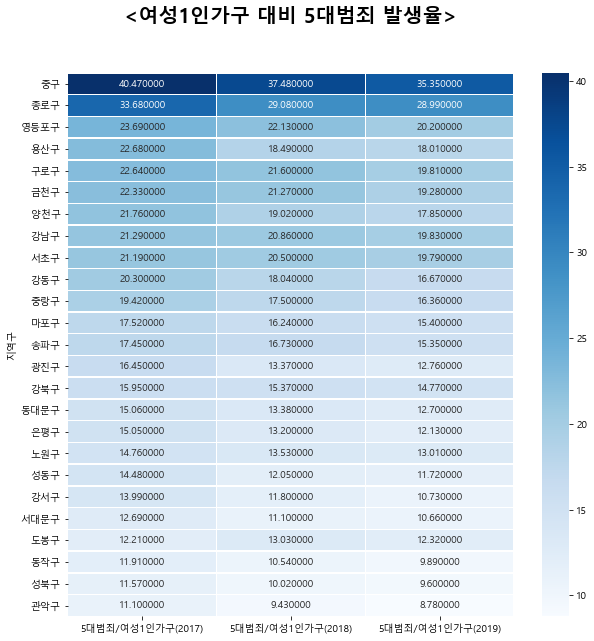

In [160]:
# 여성1인가구대비 5대범죄율 히트맵
target_col = ['5대범죄/여성1인가구(2017)','5대범죄/여성1인가구(2018)','5대범죄/여성1인가구(2019)']

# crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(htmap_final[target_col], annot=True, fmt='f',
           linewidths=.5, cmap='Blues')
plt.title('<여성1인가구 대비 5대범죄 발생율>',fontsize=20,pad=50,fontweight="bold")
plt.savefig('../[0]data/여성1인가구_대비_5대범죄발생율_fin.png')
plt.show()


#cmap='BuPu'
#cmap="RdPu"

## 여성1인가구수와 강간범죄 시각화

In [161]:
#강간강제추행 데이터 추출
crime_as_2017 = crime_seoul_2017[['강간강제추행']]
crime_as_2018 = crime_seoul_2018[['강간강제추행']]
crime_as_2019 = crime_seoul_2019[['강간강제추행']]

In [162]:
crime_as_2017
crime_as_2018
crime_as_2019

,강간강제추행
지역구,
강남구,607
영등포구,455
송파구,288
관악구,379
마포구,500
강서구,316
구로구,328
서초구,470
광진구,261


,강간강제추행
지역구,
강남구,600
영등포구,391
송파구,309
마포구,473
관악구,352
구로구,250
서초구,470
강서구,269
중랑구,174


,강간강제추행
지역구,
강남구,666
영등포구,356
송파구,273
서초구,616
관악구,408
강서구,306
마포구,495
구로구,226
중구,195


In [163]:
# 두개(여성1인가구합계,강간강제추행)의 데이터 합치기(지역구를 기준으로)
as_female_2017=pd.merge(crime_as_2017,female_total_2017,on='지역구')
as_female_2018=pd.merge(crime_as_2018,female_total_2018,on='지역구')
as_female_2019=pd.merge(crime_as_2018,female_total_2019,on='지역구')

In [164]:
as_female_2017
as_female_2018
as_female_2019

,강간강제추행,합계
지역구,,
강남구,607,36259
영등포구,455,25198
송파구,288,31947
관악구,379,49787
마포구,500,30126
강서구,316,36703
구로구,328,21618
서초구,470,22219
광진구,261,28236


,강간강제추행,합계
지역구,,
강남구,600,36009
영등포구,391,26387
송파구,309,34711
마포구,473,31845
관악구,352,53288
구로구,250,22264
서초구,470,23055
강서구,269,39231
중랑구,174,24496


,강간강제추행,합계
지역구,,
강남구,600,37886
영등포구,391,28917
송파구,309,37825
마포구,473,33577
관악구,352,57263
구로구,250,24285
서초구,470,23875
강서구,269,43142
중랑구,174,26208


In [165]:
# 컬럼명 재설정 (5대범죄 발생건수 / 1인여성가구 합계)

as_female_2017.rename(columns = {'강간강제추행' : '강간',
                                   '합계':'여성1인가구'},inplace = True)
as_female_2018.rename(columns = {'강간강제추행' : '강간',
                                   '합계':'여성1인가구'},inplace = True)
as_female_2019.rename(columns = {'강간강제추행' : '강간',
                                   '합계':'여성1인가구'},inplace = True)

In [166]:
# 여성 1인가구 대비 5대 범죄 발생율 데이터 구하기 -> 2017

as_female_2017["강간/여성1인가구"]=(as_female_2017['강간']/as_female_2017["여성1인가구"]*100).round(2)
as_female_2017=as_female_2017.sort_values('강간/여성1인가구',ascending=False)
as_female_2017

,강간,여성1인가구,강간/여성1인가구
지역구,,,
중구,267,10338,2.58
서초구,470,22219,2.12
종로구,253,12044,2.10
용산구,327,17900,1.83
영등포구,455,25198,1.81
강남구,607,36259,1.67
마포구,500,30126,1.66
금천구,240,14623,1.64
구로구,328,21618,1.52


In [167]:
as_female_2018["강간/여성1인가구"]=(as_female_2018['강간']/as_female_2018["여성1인가구"]*100).round(2)
as_female_2018=as_female_2018.sort_values('강간/여성1인가구',ascending=False)
as_female_2018

,강간,여성1인가구,강간/여성1인가구
지역구,,,
서초구,470,23055,2.04
중구,207,10751,1.93
종로구,236,12691,1.86
용산구,331,18446,1.79
강남구,600,36009,1.67
마포구,473,31845,1.49
영등포구,391,26387,1.48
금천구,200,15485,1.29
구로구,250,22264,1.12


In [168]:
as_female_2019["강간/여성1인가구"]=(as_female_2019['강간']/as_female_2019["여성1인가구"]*100).round(2)
as_female_2019=as_female_2019.sort_values('강간/여성1인가구',ascending=False)
as_female_2019

,강간,여성1인가구,강간/여성1인가구
지역구,,,
서초구,470,23875,1.97
종로구,236,12729,1.85
중구,207,11401,1.82
용산구,331,18944,1.75
강남구,600,37886,1.58
마포구,473,33577,1.41
영등포구,391,28917,1.35
금천구,200,17079,1.17
구로구,250,24285,1.03


In [169]:
as_female2017 = as_female_2017[['강간/여성1인가구']]
as_female2018 = as_female_2018[['강간/여성1인가구']]
as_female2019 = as_female_2019[['강간/여성1인가구']]

In [170]:
as_female1 = as_female2017.merge(as_female2018,on='지역구')


In [171]:
as_female = as_female1.merge(as_female2019,on='지역구')

In [172]:
# 컬럼명 년도별로 재설정 

as_female.rename(columns = {'강간/여성1인가구_x' : '강간/여성1인가구(2017)',
                                   '강간/여성1인가구_y' : '강간/여성1인가구(2018)',
                            '강간/여성1인가구':'강간/여성1인가구(2019)' },inplace = True)

In [173]:
as_female

,강간/여성1인가구(2017),강간/여성1인가구(2018),강간/여성1인가구(2019)
지역구,,,
중구,2.58,1.93,1.82
서초구,2.12,2.04,1.97
종로구,2.10,1.86,1.85
용산구,1.83,1.79,1.75
영등포구,1.81,1.48,1.35
강남구,1.67,1.67,1.58
마포구,1.66,1.49,1.41
금천구,1.64,1.29,1.17
구로구,1.52,1.12,1.03


<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='지역구'>

Text(0.5, 1.0, '여성1인가구 대비 강간 발생율')

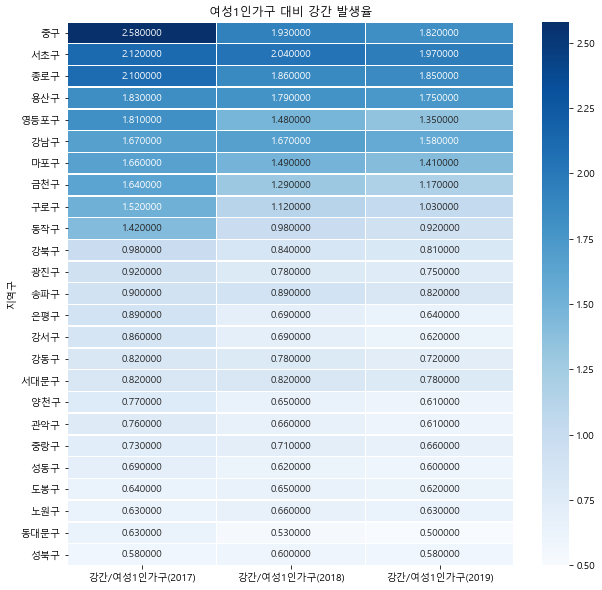

In [174]:
# 여성1인가구대비 강간범죄 히트맵

# colors=['#4E6BA6','#85BFF2']
# palette = sns.color_palette(colors)

target_col = ['강간/여성1인가구(2017)','강간/여성1인가구(2018)','강간/여성1인가구(2019)']

# crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(as_female[target_col], annot=True, fmt='f',
           linewidths=.5, cmap='Blues')
plt.title('여성1인가구 대비 강간 발생율')
plt.savefig('../[0]data/여성1인가구_대비_강간범죄발생율.png')
plt.show()

#cmap='BuPu'
#cmap="RdPu"
#cmap='viridis'